# Algoritmo de Deutsch

In [1]:
import numpy as np

from qiskit import *

In [2]:
# Criação do oráculo

def d_oracle(caso):
    oracle = QuantumCircuit(2)
    
    f0_eh_0 = np.random.randint(0, 2)
    
    if caso == 'c':
        if f0_eh_0:
            oracle.i(1)
        else:
            oracle.x(1)
    elif caso == 'b':
        if f0_eh_0:
            oracle.cx(0, 1)
        else:
            oracle.x(0)
            oracle.cx(0, 1)
            oracle.x(0)
    
    return oracle

In [3]:
# Criação da porta que representa o oráculo

caso = np.random.choice(['c', 'b']) # sorteia c ou b

circuito_Uf = d_oracle(caso)

Uf = circuito_Uf.to_gate() # transforma o circuito em porta lógica

Uf.name = '$U_f$'   # dá um nome para o circuito

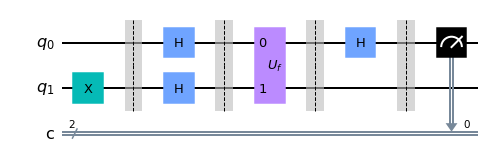

In [4]:
# Circuito que implementa o algoritmo de Deutsch

qc = QuantumCircuit(2, 2)

qc.x(1)

qc.barrier()

qc.h(0)
qc.h(1)

qc.barrier()

qc.append(Uf, [0, 1])

qc.barrier()

qc.h(0)

qc.barrier()

qc.measure(0, 0)

qc.draw('mpl')

In [5]:
# Execução do Circuito

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, shots = 1, backend=backend)
resultado = job.result()

In [6]:
# Resultados

# No qiskit as bitstrings são lidas da direita para esquerda ('01' = |10>)
print(resultado.get_counts())


print(caso)

{'01': 1}
b
